# notes

1. Had to use nightly build of pudl db cos stable build did not have core_eia860__scd_generators_energy_storage table
2. Later report entries have null values
3. 

In [1]:
import pandas as pd
import sqlite3

In [2]:
# mapping of columns in the Excel sheets to the PUDL database

gen_cols_mapping = [
    'plant_code', # -> plant_id_eia
    'plant_name', # -> plant_name_eia
    'generator_id',
    'operating_year', # -> generator_operating_date
    'nameplate_capacity_mw', # -> capacity_mw
    'summer_capacity_mw',
    'winter_capacity_mw',
    'minimum_load_mw',
    'energy_source_1', # -> energy_source_code_1
    'technology', # -> technology_description
    'status', # -> operational_status_code
    'prime_mover', # -> prime_mover_code
    'operating_month', # -> generator_operating_date
    'operating_year', # -> generator_operating_date
    'planned_retirement_month', # -> planned_generator_retirement_date
    'planned_retirement_year', # -> planned_generator_retirement_date
    'state',
    ]

storage_cols_mapping = [
    'plant_code', # -> plant_id_eia
    'generator_id',
    'nameplate_energy_capacity_mwh', # -> energy_storage_capacity_mwh
    'maximum_charge_rate_mw', # -> max_charge_rate_mw
    'maximum_discharge_rate_mw', # -> max_discharge_rate_mw
    'storage_technology_1'] # -> storage_technology_code_1

locs_cols_mapping = [
    'plant_code', # -> plant_id_eia
    'nerc_region',
    'balancing_authority_code', # -> balancing_authority_code_eia
    'latitude',
    'longitude']

con = sqlite3.connect("/home/stephen/Downloads/pudl.sqlite(1)/pudl.sqlite")

cur = con.cursor()

res = cur.execute("""SELECT m.name as tableName,
       p.name as columnName
FROM sqlite_master m
left outer join pragma_table_info((m.name)) p
     on m.name <> p.name
order by tableName, columnName""")

table_cols = res.fetchall()



In [3]:
eia_data_operable = pd.read_sql_query(
    """
    SELECT
        core_eia860__scd_generators.plant_id_eia,
        _out_eia__yearly_generators.plant_name_eia,
        core_eia860__scd_generators.generator_id,
        core_eia860__scd_generators.capacity_mw,
        core_eia860__scd_generators.summer_capacity_mw,
        core_eia860__scd_generators.winter_capacity_mw,
        core_eia860__scd_generators.minimum_load_mw,
        core_eia860__scd_generators.energy_source_code_1,
        core_eia860__scd_generators.technology_description,
        core_eia860__scd_generators.operational_status,
        core_eia860__scd_generators.prime_mover_code,
        core_eia860__scd_generators.planned_generator_retirement_date,
        core_eia860__scd_generators.energy_storage_capacity_mwh,
        _out_eia__yearly_generators.generator_operating_date,
        core_eia860__scd_generators_energy_storage.max_charge_rate_mw,
        core_eia860__scd_generators_energy_storage.max_discharge_rate_mw,
        core_eia860__scd_generators_energy_storage.storage_technology_code_1,
        core_eia860__scd_plants.nerc_region,
        core_eia860__scd_plants.balancing_authority_code_eia,
        _out_eia__yearly_generators.state,
        _out_eia__yearly_generators.latitude,
        _out_eia__yearly_generators.longitude
    FROM core_eia860__scd_generators
    LEFT JOIN _out_eia__yearly_generators ON core_eia860__scd_generators.plant_id_eia = _out_eia__yearly_generators.plant_id_eia AND core_eia860__scd_generators.generator_id = _out_eia__yearly_generators.generator_id
    LEFT JOIN core_eia860__scd_generators_energy_storage ON core_eia860__scd_generators.plant_id_eia = core_eia860__scd_generators_energy_storage.plant_id_eia AND core_eia860__scd_generators.generator_id = core_eia860__scd_generators_energy_storage.generator_id
    LEFT JOIN core_eia860__scd_plants ON core_eia860__scd_generators.plant_id_eia = core_eia860__scd_plants.plant_id_eia
    WHERE core_eia860__scd_generators.operational_status = 'existing'
    GROUP BY core_eia860__scd_generators.plant_id_eia, core_eia860__scd_generators.generator_id
    HAVING MAX(core_eia860__scd_generators.report_date)
    ORDER BY core_eia860__scd_generators.report_date DESC
    """,
    con,
)


In [4]:
eia_data_operable


,plant_id_eia,plant_name_eia,generator_id,capacity_mw,summer_capacity_mw,winter_capacity_mw,minimum_load_mw,energy_source_code_1,technology_description,operational_status,...,energy_storage_capacity_mwh,generator_operating_date,max_charge_rate_mw,max_discharge_rate_mw,storage_technology_code_1,nerc_region,balancing_authority_code_eia,state,latitude,longitude
0,1,Sand Point,1,0.9,0.4,0.4,NaN,DFO,Petroleum Liquids,existing,...,NaN,2000-12-01,NaN,NaN,None,UNK,None,AK,55.339722,-160.497223
1,1,Sand Point,2,0.9,0.3,0.3,NaN,DFO,Petroleum Liquids,existing,...,NaN,2000-12-01,NaN,NaN,None,UNK,None,AK,55.339722,-160.497223
2,1,Sand Point,3,0.5,0.3,0.3,NaN,DFO,Petroleum Liquids,existing,...,NaN,2010-12-01,NaN,NaN,None,UNK,None,AK,55.339722,-160.497223
3,1,Sand Point,5.1,0.4,0.3,0.3,NaN,DFO,Petroleum Liquids,existing,...,NaN,2023-02-01,NaN,NaN,None,UNK,None,AK,55.339722,-160.497223
4,1,Sand Point,WT1,0.5,0.1,0.1,NaN,WND,Onshore Wind Turbine,existing,...,NaN,2011-10-01,NaN,NaN,None,UNK,None,AK,55.339722,-160.497223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33854,55946,Power Plant 3,GEN8,20.0,20.0,20.0,NaN,NG,None,existing,...,NaN,1966-01-01,NaN,NaN,None,SERC,None,TX,NaN,NaN
33855,55946,Power Plant 3,GEN9,30.0,30.0,30.0,NaN,NG,None,existing,...,NaN,1967-01-01,NaN,NaN,None,SERC,None,TX,NaN,NaN
33856,55978,Montfort Wind Farm,1,30.0,30.0,30.0,NaN,WND,None,existing,...,NaN,2001-06-01,NaN,NaN,None,MAPP,None,WI,NaN,NaN
33857,55983,Salton Sea Unit 5,TG-5,49.9,49.0,49.0,NaN,GEO,None,existing,...,NaN,2000-04-01,NaN,NaN,None,WSCC,None,CA,33.153301,-115.638397


In [5]:
eia_data_operable.loc[eia_data_operable.state.isin(['AK', 'HI']), 'nerc_region'] = 'non-conus'
eia_data_operable.loc[eia_data_operable.state.isin(['AK', 'HI']), 'balancing_authority_code'] = 'non-conus'
eia_data_operable



,plant_id_eia,plant_name_eia,generator_id,capacity_mw,summer_capacity_mw,winter_capacity_mw,minimum_load_mw,energy_source_code_1,technology_description,operational_status,...,generator_operating_date,max_charge_rate_mw,max_discharge_rate_mw,storage_technology_code_1,nerc_region,balancing_authority_code_eia,state,latitude,longitude,balancing_authority_code
0,1,Sand Point,1,0.9,0.4,0.4,NaN,DFO,Petroleum Liquids,existing,...,2000-12-01,NaN,NaN,None,non-conus,None,AK,55.339722,-160.497223,non-conus
1,1,Sand Point,2,0.9,0.3,0.3,NaN,DFO,Petroleum Liquids,existing,...,2000-12-01,NaN,NaN,None,non-conus,None,AK,55.339722,-160.497223,non-conus
2,1,Sand Point,3,0.5,0.3,0.3,NaN,DFO,Petroleum Liquids,existing,...,2010-12-01,NaN,NaN,None,non-conus,None,AK,55.339722,-160.497223,non-conus
3,1,Sand Point,5.1,0.4,0.3,0.3,NaN,DFO,Petroleum Liquids,existing,...,2023-02-01,NaN,NaN,None,non-conus,None,AK,55.339722,-160.497223,non-conus
4,1,Sand Point,WT1,0.5,0.1,0.1,NaN,WND,Onshore Wind Turbine,existing,...,2011-10-01,NaN,NaN,None,non-conus,None,AK,55.339722,-160.497223,non-conus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33854,55946,Power Plant 3,GEN8,20.0,20.0,20.0,NaN,NG,None,existing,...,1966-01-01,NaN,NaN,None,SERC,None,TX,NaN,NaN,NaN
33855,55946,Power Plant 3,GEN9,30.0,30.0,30.0,NaN,NG,None,existing,...,1967-01-01,NaN,NaN,None,SERC,None,TX,NaN,NaN,NaN
33856,55978,Montfort Wind Farm,1,30.0,30.0,30.0,NaN,WND,None,existing,...,2001-06-01,NaN,NaN,None,MAPP,None,WI,NaN,NaN,NaN
33857,55983,Salton Sea Unit 5,TG-5,49.9,49.0,49.0,NaN,GEO,None,existing,...,2000-04-01,NaN,NaN,None,WSCC,None,CA,33.153301,-115.638397,NaN


In [6]:
eia_data_operable['summer_derate'] = 1 - ((eia_data_operable.capacity_mw - eia_data_operable.summer_capacity_mw) / eia_data_operable.capacity_mw)
eia_data_operable['winter_derate'] = 1 - ((eia_data_operable.capacity_mw - eia_data_operable.winter_capacity_mw) / eia_data_operable.capacity_mw)
eia_data_operable.summer_derate = eia_data_operable.summer_derate.clip(upper=1).clip(lower=0)
eia_data_operable.winter_derate = eia_data_operable.winter_derate.clip(upper=1).clip(lower=0)
eia_data_operable


,plant_id_eia,plant_name_eia,generator_id,capacity_mw,summer_capacity_mw,winter_capacity_mw,minimum_load_mw,energy_source_code_1,technology_description,operational_status,...,max_discharge_rate_mw,storage_technology_code_1,nerc_region,balancing_authority_code_eia,state,latitude,longitude,balancing_authority_code,summer_derate,winter_derate
0,1,Sand Point,1,0.9,0.4,0.4,NaN,DFO,Petroleum Liquids,existing,...,NaN,None,non-conus,None,AK,55.339722,-160.497223,non-conus,0.444444,0.444444
1,1,Sand Point,2,0.9,0.3,0.3,NaN,DFO,Petroleum Liquids,existing,...,NaN,None,non-conus,None,AK,55.339722,-160.497223,non-conus,0.333333,0.333333
2,1,Sand Point,3,0.5,0.3,0.3,NaN,DFO,Petroleum Liquids,existing,...,NaN,None,non-conus,None,AK,55.339722,-160.497223,non-conus,0.600000,0.600000
3,1,Sand Point,5.1,0.4,0.3,0.3,NaN,DFO,Petroleum Liquids,existing,...,NaN,None,non-conus,None,AK,55.339722,-160.497223,non-conus,0.750000,0.750000
4,1,Sand Point,WT1,0.5,0.1,0.1,NaN,WND,Onshore Wind Turbine,existing,...,NaN,None,non-conus,None,AK,55.339722,-160.497223,non-conus,0.200000,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33854,55946,Power Plant 3,GEN8,20.0,20.0,20.0,NaN,NG,None,existing,...,NaN,None,SERC,None,TX,NaN,NaN,NaN,1.000000,1.000000
33855,55946,Power Plant 3,GEN9,30.0,30.0,30.0,NaN,NG,None,existing,...,NaN,None,SERC,None,TX,NaN,NaN,NaN,1.000000,1.000000
33856,55978,Montfort Wind Farm,1,30.0,30.0,30.0,NaN,WND,None,existing,...,NaN,None,MAPP,None,WI,NaN,NaN,NaN,1.000000,1.000000
33857,55983,Salton Sea Unit 5,TG-5,49.9,49.0,49.0,NaN,GEO,None,existing,...,NaN,None,WSCC,None,CA,33.153301,-115.638397,NaN,0.981964,0.981964


In [7]:
# Assign PyPSA Carrier Names, Fuel Types, and Prime Movers Names
eia_tech_map = pd.DataFrame({
    "Technology": [
        "Petroleum Liquids",
        "Onshore Wind Turbine",
        "Conventional Hydroelectric",
        "Natural Gas Steam Turbine",
        "Conventional Steam Coal",
        "Natural Gas Fired Combined Cycle",
        "Natural Gas Fired Combustion Turbine",
        "Nuclear",
        "Hydroelectric Pumped Storage",
        "Natural Gas Internal Combustion Engine",
        "Solar Photovoltaic",
        "Geothermal",
        "Landfill Gas",
        "Batteries",
        "Wood/Wood Waste Biomass",
        "Coal Integrated Gasification Combined Cycle",
        "Other Gases",
        "Petroleum Coke",
        "Municipal Solid Waste",
        "Natural Gas with Compressed Air Storage",
        "All Other",
        "Other Waste Biomass",
        "Solar Thermal without Energy Storage",
        "Other Natural Gas",
        "Solar Thermal with Energy Storage",
        "Flywheels",
        "Offshore Wind Turbine",
    ],
    "tech_type": [
        "oil",
        "onwind",
        "hydro",
        "OCGT",
        "coal",
        "CCGT",
        "OCGT",
        "nuclear",
        "hydro",
        "OCGT",
        "solar",
        "geothermal",
        "biomass",
        "battery",
        "biomass",
        "coal",
        "other",
        "oil",
        "waste",
        "other",
        "other",
        "biomass",
        "solar",
        "other",
        "solar",
        "other",
        "offwind",
    ]
})
eia_tech_map.set_index("Technology", inplace=True)
eia_fuel_map = pd.DataFrame({
    "Energy Source 1": [
        "ANT",
        "BIT",
        "LIG",
        "SGC",
        "SUB",
        "WC",
        "RC",
        "DFO",
        "JF",
        "KER",
        "PC",
        "PG",
        "RFO",
        "SGP",
        "WO",
        "BFG",
        "NG",
        "H2",
        "OG",
        "AB",
        "MSW",
        "OBS",
        "WDS",
        "OBL",
        "SLW",
        "BLQ",
        "WDL",
        "LFG",
        "OBG",
        "SUN",
        "WND",
        "GEO",
        "WAT",
        "NUC",
        "PUR",
        "WH",
        "TDF",
        "MWH",
        "OTH",
    ],
    "fuel_type": [
        "coal",
        "coal",
        "coal",
        "coal",
        "coal",
        "coal",
        "coal",
        "oil",
        "oil",
        "oil",
        "oil",
        "oil",
        "oil",
        "oil",
        "oil",
        "gas",
        "gas",
        "gas",
        "gas",
        "waste",
        "waste",
        "waste",
        "waste",
        "biomass",
        "biomass",
        "biomass",
        "biomass",
        "biomass",
        "biomass",
        "solar",
        "wind",
        "geothermal",
        "hydro",
        "nuclear",
        "other",
        "other",
        "other",
        "other",
        "other",
    ],
    "fuel_name": [
        "Anthracite Coal",
        "Bituminous Coal",
        "Lignite Coal",
        "Coal-Derived Synthesis Gas",
        "Subbituminous Coal",
        "Waste/Other Coal",
        "Refined Coal",
        "Distillate Fuel Oil",
        "Jet Fuel",
        "Kerosene",
        "Petroleum Coke",
        "Gaseous Propane",
        "Residual Fuel Oil",
        "Synthesis Gas from Petroleum Coke",
        "Waste/Other Oil",
        "Blast Furnace Gas",
        "Natural Gas",
        "Hydrogen",
        "Other Gas",
        "Agricultural By-Products",
        "Municipal Solid Waste",
        "Other Biomass Solids",
        "Wood/Wood Waste Solids",
        "Other Biomass Liquids",
        "Sludge Waste",
        "Black Liquor",
        "Wood Waste Liquids excluding Black Liquor",
        "Landfill Gas",
        "Other Biomass Gas",
        "Solar",
        "Wind",
        "Geothermal",
        "Water",
        "Nuclear",
        "Purchased Steam",
        "Waste heat not directly attributed to a fuel source (undetermined)",
        "Tire-derived Fuels",
        "Energy Storage",
        "Other",
    ]
})
eia_fuel_map.set_index("Energy Source 1", inplace=True)
eia_primemover_map = pd.DataFrame({
    "Prime Mover": [
        "BA",
        "CE",
        "CP",
        "FW",
        "PS",
        "ES",
        "ST",
        "GT",
        "IC",
        "CA",
        "CT",
        "CS",
        "CC",
        "HA",
        "HB",
        "HK",
        "HY",
        "BT",
        "PV",
        "WT",
        "WS",
        "FC",
        "OT",
    ],
    "prime_mover": [
        "Energy Storage, Battery",
        "Energy Storage, Compressed Air",
        "Energy Storage, Concentrated Solar Power",
        "Energy Storage, Flywheel",
        "Energy Storage, Reversible Hydraulic Turbine (Pumped Storage)",
        "Energy Storage, Other",
        "Steam Turbine, including nuclear, geothermal and solar steam (does NOT include combined cycle)",
        "Combustion (Gas) Turbine",
        "Internal Combustion Engine",
        "Combined Cycle Steam Part",
        "Combined Cycle Combustion Turbine Part",
        "Combined Cycle Single Shaft",
        "Combined Cycle Total Unit (planned undetermined plants)",
        "Hydrokinetic, Axial Flow Turbine",
        "Hydrokinetic, Wave Buoy",
        "Hydrokinetic, Other",
        "Hydroelectric Turbine",
        "Turbines Used in a Binary Cycle (including those used for geothermal applications)",
        "Photovoltaic",
        "Wind Turbine, Onshore",
        "Wind Turbine, Offshore",
        "Fuel Cell",
        "Other",
    ]
})
eia_primemover_map.set_index("Prime Mover", inplace=True)

# Map technologies, fuels, and prime movers
maps = {
    "carrier": (eia_data_operable["technology_description"], eia_tech_map["tech_type"]),
    "fuel_type": (eia_data_operable["energy_source_code_1"], eia_fuel_map["fuel_type"]),
    "fuel_name": (eia_data_operable["energy_source_code_1"], eia_fuel_map["fuel_name"]),
    "prime_mover_name": (eia_data_operable["prime_mover_code"], eia_primemover_map["prime_mover"]),
}
for col, (data_col, map_df) in maps.items():
    eia_data_operable[col] = data_col.map(dict(zip(map_df.index, map_df.values)))

eia_data_operable

,plant_id_eia,plant_name_eia,generator_id,capacity_mw,summer_capacity_mw,winter_capacity_mw,minimum_load_mw,energy_source_code_1,technology_description,operational_status,...,state,latitude,longitude,balancing_authority_code,summer_derate,winter_derate,carrier,fuel_type,fuel_name,prime_mover_name
0,1,Sand Point,1,0.9,0.4,0.4,NaN,DFO,Petroleum Liquids,existing,...,AK,55.339722,-160.497223,non-conus,0.444444,0.444444,oil,oil,Distillate Fuel Oil,Internal Combustion Engine
1,1,Sand Point,2,0.9,0.3,0.3,NaN,DFO,Petroleum Liquids,existing,...,AK,55.339722,-160.497223,non-conus,0.333333,0.333333,oil,oil,Distillate Fuel Oil,Internal Combustion Engine
2,1,Sand Point,3,0.5,0.3,0.3,NaN,DFO,Petroleum Liquids,existing,...,AK,55.339722,-160.497223,non-conus,0.600000,0.600000,oil,oil,Distillate Fuel Oil,Internal Combustion Engine
3,1,Sand Point,5.1,0.4,0.3,0.3,NaN,DFO,Petroleum Liquids,existing,...,AK,55.339722,-160.497223,non-conus,0.750000,0.750000,oil,oil,Distillate Fuel Oil,Internal Combustion Engine
4,1,Sand Point,WT1,0.5,0.1,0.1,NaN,WND,Onshore Wind Turbine,existing,...,AK,55.339722,-160.497223,non-conus,0.200000,0.200000,onwind,wind,Wind,"Wind Turbine, Onshore"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33854,55946,Power Plant 3,GEN8,20.0,20.0,20.0,NaN,NG,None,existing,...,TX,NaN,NaN,NaN,1.000000,1.000000,NaN,gas,Natural Gas,"Steam Turbine, including nuclear, geothermal a..."
33855,55946,Power Plant 3,GEN9,30.0,30.0,30.0,NaN,NG,None,existing,...,TX,NaN,NaN,NaN,1.000000,1.000000,NaN,gas,Natural Gas,"Steam Turbine, including nuclear, geothermal a..."
33856,55978,Montfort Wind Farm,1,30.0,30.0,30.0,NaN,WND,None,existing,...,WI,NaN,NaN,NaN,1.000000,1.000000,NaN,wind,Wind,"Wind Turbine, Onshore"
33857,55983,Salton Sea Unit 5,TG-5,49.9,49.0,49.0,NaN,GEO,None,existing,...,CA,33.153301,-115.638397,NaN,0.981964,0.981964,NaN,geothermal,Geothermal,"Steam Turbine, including nuclear, geothermal a..."


In [8]:
#Examine carrier assignments
non_matching = eia_data_operable[eia_data_operable.carrier != eia_data_operable.fuel_type]
pivot = non_matching.pivot_table(index=['fuel_type','fuel_name'], columns=['carrier','prime_mover_name'], values='capacity_mw', aggfunc='sum', fill_value=0)
pivot

carrier                                                              CCGT  \
prime_mover_name                   Combined Cycle Combustion Turbine Part   
fuel_type fuel_name                                                         
gas       Blast Furnace Gas                                           0.0   
          Natural Gas                                            194742.0   
          Other Gas                                                   0.0   
other     Energy Storage                                              0.0   
waste     Agricultural By-Products                                    0.0   
          Other Biomass Solids                                        0.0   
          Wood/Wood Waste Solids                                      0.0   
wind      Wind                                                        0.0   

carrier                                                         \
prime_mover_name                   Combined Cycle Single Shaft   
fuel_type fuel_name                                              
gas       Blast Furnace Gas                                0.0   
          Natural Gas                                  20782.8   
          Other Gas                                        0.0   
other     Energy Storage                                   0.0   
waste     Agricultural By-Products                         0.0   
          Other Biomass Solids                             0.0   
          Wood/Wood Waste Solids                           0.0   
wind      Wind                                             0.0   

carrier                                                       \
prime_mover_name                   Combined Cycle Steam Part   
fuel_type fuel_name                                            
gas       Blast Furnace Gas                              0.0   
          Natural Gas                               118422.2   
          Other Gas                                      0.0   
other     Energy Storage                                 0.0   
waste     Agricultural By-Products                       0.0   
          Other Biomass Solids                           0.0   
          Wood/Wood Waste Solids                         0.0   
wind      Wind                                           0.0   

carrier                                                OCGT  \
prime_mover_name                   Combustion (Gas) Turbine   
fuel_type fuel_name                                           
gas       Blast Furnace Gas                             0.0   
          Natural Gas                              167103.3   
          Other Gas                                     0.0   
other     Energy Storage                                0.0   
waste     Agricultural By-Products                      0.0   
          Other Biomass Solids                          0.0   
          Wood/Wood Waste Solids                        0.0   
wind      Wind                                          0.0   

carrier                                                        \
prime_mover_name                   Internal Combustion Engine   
fuel_type fuel_name                                             
gas       Blast Furnace Gas                               0.0   
          Natural Gas                                  6309.7   
          Other Gas                                       0.0   
other     Energy Storage                                  0.0   
waste     Agricultural By-Products                        0.0   
          Other Biomass Solids                            0.0   
          Wood/Wood Waste Solids                          0.0   
wind      Wind                                            0.0   

carrier                                                                                                                            \
prime_mover_name                   Steam Turbine, including nuclear, geothermal and solar steam (does NOT include combined cycle)   
fuel_type fuel_name                         

<Axes: title={'center': 'Total Nameplate Capacity by Technology Type (MW)'}, xlabel='carrier'>

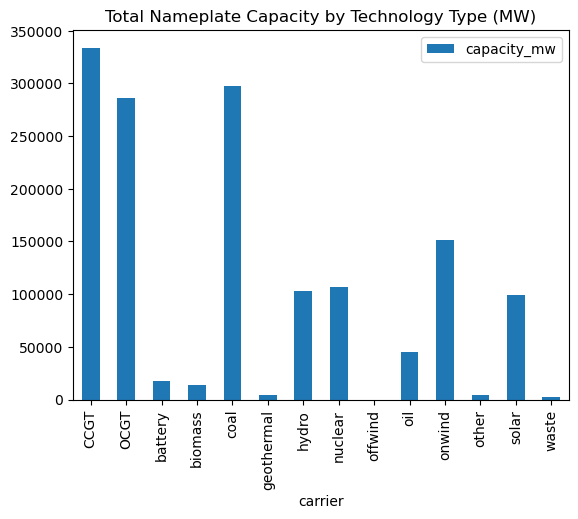

In [9]:
eia_data_operable[['carrier', 'capacity_mw']].groupby('carrier').sum().plot(kind='bar', title='Total Nameplate Capacity by Technology Type (MW)')

<Axes: title={'center': 'Total Nameplate Capacity by Technology Type (MW)'}, xlabel='carrier'>

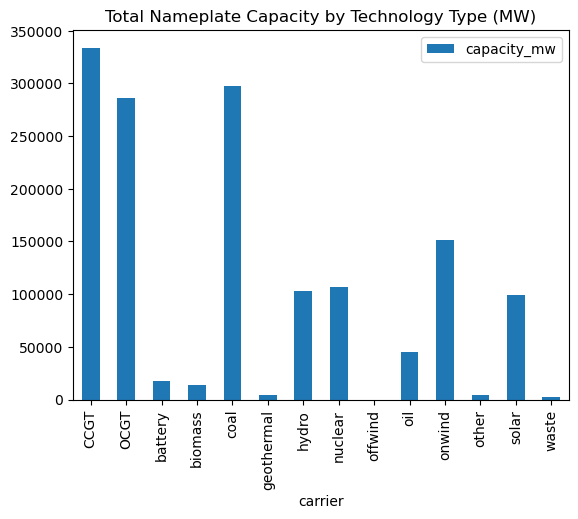

In [10]:
eia_data_operable[['carrier', 'capacity_mw']].groupby('carrier').sum().plot(kind='bar', title='Total Nameplate Capacity by Technology Type (MW)')